In [3]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) 
    if isinstance(skill_list, str) else skill_list)

c:\Users\DeLL\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Defining the Job country (US in this case)

In [4]:
df_us = df[df['job_country'] == 'United States']

Exploding the df_skills for so that each skill is a seperate source

In [5]:
df_skills = df_us.explode('job_skills')
df_skills[['job_skills', 'job_title']]

,job_skills,job_title
0,None,Senior Clinical Data Engineer / Principal Clin...
3,python,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...
3,c++,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...
3,java,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...
3,matlab,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...
...,...,...
785692,r,Data Scientist- Hybrid Work Location
785703,None,Data Analyst - CRYPTOGRAPHY - Full-time
785705,sql,Expert Business Data Analyst - Now Hiring
785705,python,Expert Business Data Analyst - Now Hiring


Grouping the Job skills by their count (From Highest to Lowest)

In [17]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = df_skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


Acquiring the Job titles

In [22]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

Plotting the visualization

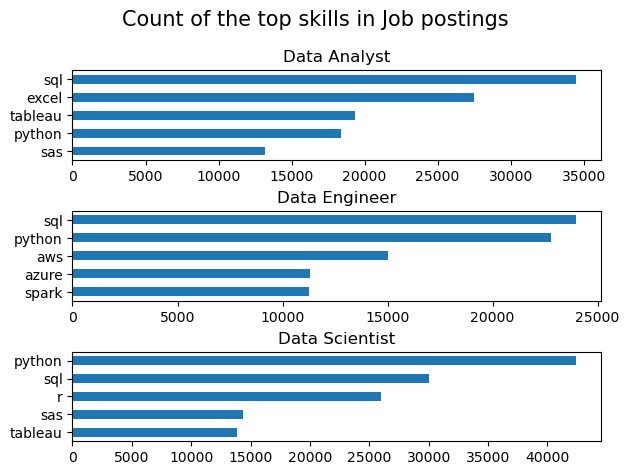

In [30]:
fig, ax = plt.subplots(len(job_titles),1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i],title = job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Count of the top skills in Job postings',fontsize=15)
fig.tight_layout(h_pad=0.5)
plt.show()

In [33]:
df_job_title_count = df_us['job_title_short'].value_counts().reset_index(name='job_total')

In [37]:
df_skills_percent = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')
df_skills_percent['skill_percent'] = (df_skills_percent['skill_count'] / df_skills_percent['job_total'])*100
df_skills_percent

,job_skills,job_title_short,skill_count,job_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


making a visualization for the abpve (using seaborn)

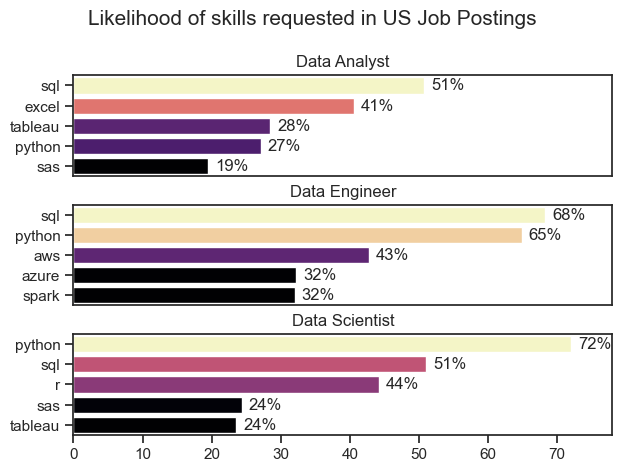

In [68]:
fig, ax = plt.subplots(len(job_titles),1)
sns.set_theme(style='ticks')
for i, job_title in enumerate(job_titles):
    df_plot = df_skills_percent[df_skills_percent['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax = ax[i], hue='skill_count', palette='magma')
    ax[i].set_title(job_title)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0,78)

    for n, v in enumerate (df_plot['skill_percent']):
        ax[i].text(v +1  , n , f'{v:.0f}%',va='center')

    if i!= len(job_titles) - 1:
        ax[i].set_xticks([])

fig.suptitle('Likelihood of skills requested in US Job Postings',fontsize=15)
fig.tight_layout(h_pad=0.5)
plt.show()